In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr

In [2]:
df=pd.read_csv("c:/Users/Sreehari/Downloads/Sales_data_zone_wise.csv")

In [4]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [5]:
df.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [6]:
print('There are ',df.shape[0],'rows and ',df.shape[1],'columns in the dataset.')

There are  29 rows and  5 columns in the dataset.


In [7]:
df.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

there are no null values in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


# The mean sales generated by each zone.

In [13]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D,sum
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06,6.911851e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05,5.908919e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06,5.925424e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06,6.506659e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06,7.032783e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06,7.155515e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06,8.174449e+06


The Mean for Zone A = 1.540493e+06 Zone B = 1.755560e+06 Zone C = 1.772871e+06 Zone D = 1.842927e+06

# Total sales generated by all the zones for each month

In [14]:
df["sum"] = df.sum(axis=1)

C:\Users\Sreehari\AppData\Local\Temp/ipykernel_9416/1298547789.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["sum"] = df.sum(axis=1)


In [15]:
print(df)

         Month  Zone - A  Zone - B  Zone - C  Zone - D       sum
0    Month - 1   1483525   1748451   1523308   2267260  14045088
1    Month - 2   1238428   1707421   2212113   1994341  14304606
2    Month - 3   1860771   2091194   1282374   1241600  12951878
3    Month - 4   1871571   1759617   2290580   2252681  16348898
4    Month - 5   1244922   1606010   1818334   1326062  11990656
5    Month - 6   1534390   1573128   1751825   2292044  14302774
6    Month - 7   1820196   1992031   1786826   1688055  14574216
7    Month - 8   1625696   1665534   2161754   2363315  15632598
8    Month - 9   1652644   1873402   1755290   1422059  13406790
9   Month - 10   1852450   1913059   1754314   1608387  14256420
10  Month - 11   2004480   1740365   1317869   1970069  14065566
11  Month - 12   1537539   1875658   1237722   1460165  12222168
12  Month - 13   1254939   1588473   1348629   1733383  11850848
13  Month - 14   1821799   1844081   1617376   1872259  14311030
14  Month - 15   1128185 

# Check whether all the zones generate the same amount of sales

H0 : All the zones generate the same amount of sales.

H1 : All the zones generate different amount of sales.

In [16]:
import scipy.stats as stats
alpha =0.5

In [17]:
stats.f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

<AxesSubplot:>

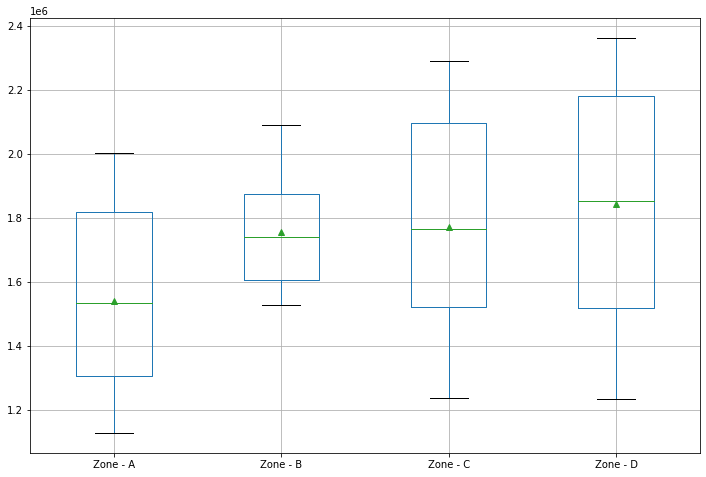

In [18]:
df.boxplot(column=['Zone - A','Zone - B','Zone - C','Zone - D'], figsize=(12, 8),showmeans= True)

pvalue= 0.0011827601694503335 which is less than 0.5 therefore reject H0

that is the zones generate different amount of sales respectively.